## House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data cleaning
- Data understanding and exploration
- Data preparation
- Model building and evaluation

In [223]:
# import all the required models
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

In [224]:
# read the dataset
df_housing = pd.read_csv("train.csv")
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [225]:
df_housing.shape

(1460, 81)

### 1. Data Understanding and Exploration

In [226]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [227]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [228]:
# Identfying and treating missing values
round((df_housing.isnull().sum()/len(df_housing.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Even though it says missing values, these are all meaningfull missing, For example NA in PoolQC is Housing with no Pools. So lets replace these values with None.<br>
But replacing 80% values will make the data imbalance, hence drop the columns with more missing values
ie., PoolQC, Fence, MiscFeature,Alley

In [229]:
df_housing.drop(['PoolQC', 'Fence', 'MiscFeature','Alley'],axis=1,inplace=True)

In [230]:
# identifying columns with missing values
df_housing.columns[df_housing.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [231]:
# replacing the other columns with missign values 
df_housing['FireplaceQu'] = df_housing['FireplaceQu'].fillna('None')
df_housing['MasVnrType'] = df_housing['MasVnrType'].fillna('None')
df_housing['Electrical'] = df_housing['Electrical'].fillna('None')

df_housing["MasVnrArea"] = df_housing["MasVnrArea"].fillna(0)
# Replacing the missing values in LotFrontage with its Mean
df_housing["LotFrontage"] = df_housing["LotFrontage"].transform(lambda x: x.fillna(x.mean()))


In [232]:
# Fill for all Basemnt categorical columns, Nan means there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_housing[col] = df_housing[col].fillna('None')

In [233]:
# Fill for all Garage categorical columns, Nan means there is no Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_housing[col] = df_housing[col].fillna('None')
df_housing['GarageYrBlt'] = df_housing['GarageYrBlt'].fillna(0)

In [234]:
round((df_housing.isnull().sum()/len(df_housing.index))*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

### Data understanding and exploration

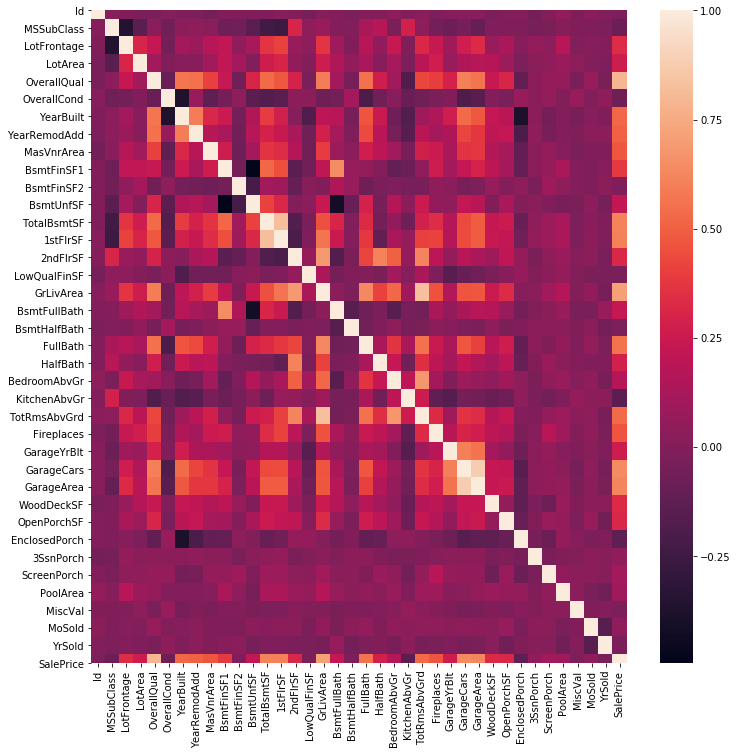

In [235]:
# identify correlation between the columns 
corrs= df_housing.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrs)

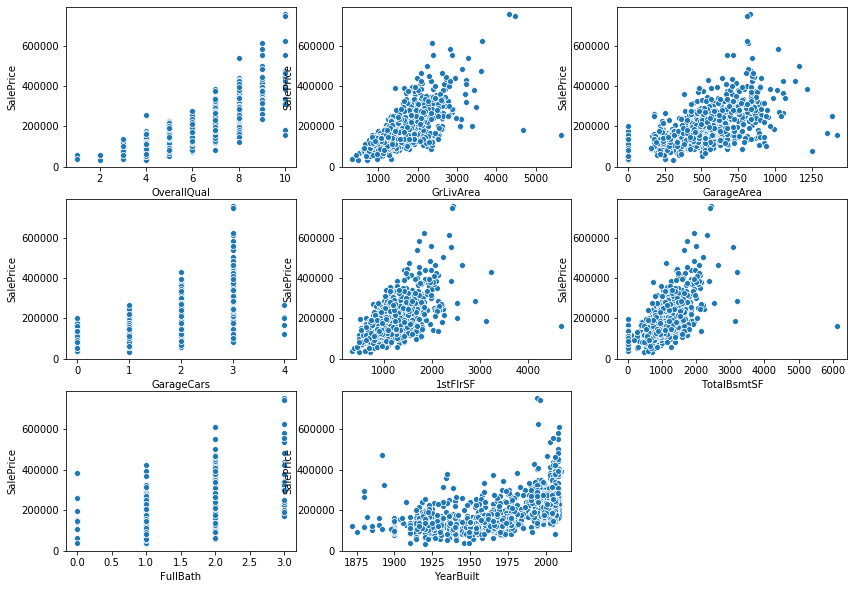

In [236]:
# Plot the correlated columns against target column SalePrice
cols = ['OverallQual', 'GrLivArea', 'GarageArea','GarageCars','1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
i=1
plt.figure(figsize=(14,10))
plt.tight_layout()
for col in cols:
    plt.subplot(3,3,i)
    sns.scatterplot(data=df_housing,y='SalePrice',x=col)
    i=i+1 

We can see that all the above columns are linearly related to Target column SalePrice

In [237]:
# we can see that GrLivArea has two outliers, so lets remove them
df_housing.sort_values(by = 'GrLivArea', ascending = False)[:2]['Id']
df_housing = df_housing.drop(df_housing[df_housing['Id'] == 1299].index)
df_housing = df_housing.drop(df_housing[df_housing['Id'] == 524].index)

#### Fixing distributions

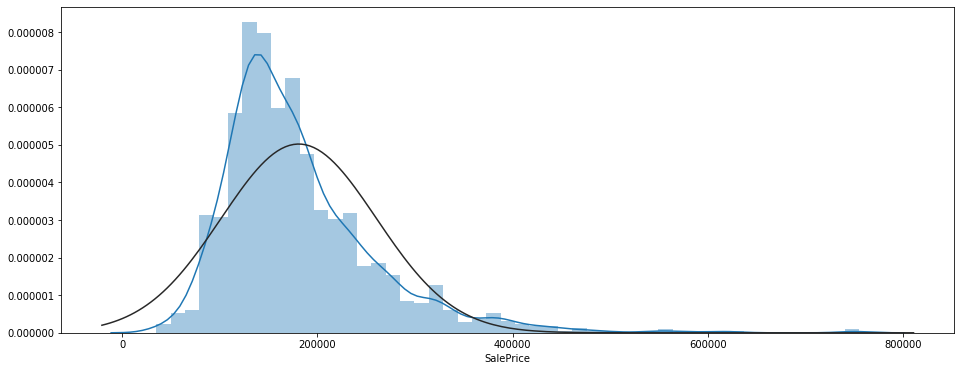

In [238]:
# saleprice
plt.figure(figsize=(16, 6))
sns.distplot(df_housing['SalePrice'],fit=stats.norm)
plt.show()

We see that the data is scewed towards right, hence we need to transform the target variable to make it normal distribution using log transformation

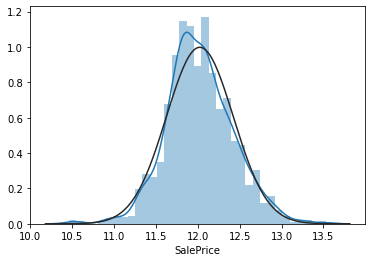

In [239]:
df_housing['SalePrice'] = np.log(df_housing['SalePrice'])
sns.distplot(df_housing['SalePrice'],fit=stats.norm)
plt.show()

#### Feature Transformation

In [240]:
# creating a new feature for Year columns
housing= df_housing.copy()
housing['YearBuilt'] = 2020-housing['YearBuilt']
housing['YearRemodAdd'] = housing['YearRemodAdd'].apply(lambda x:2020-x)
housing['GarageYrBlt'] = housing['GarageYrBlt'].apply(lambda x:2020-x if x!=0 else 0)
housing['YrSold'] = housing['YrSold'].apply(lambda x:2020-x)

In [241]:
# convert other columns to strings since they are categorical

housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['MoSold'] = housing['MoSold'].astype('object')

In [242]:
# identify columns with only 2 unique values
cols =housing.columns
for col in cols:
    vals=len(housing[col].unique())
    if vals ==2:
        print(col,vals)

Street 2
Utilities 2
CentralAir 2


We can see there are three variablw with only 2 unique values, but as per the data dictionary Utilities can have 4 values. so lets impute Street and CentralAir with binary values

In [243]:
housing['Street'] = housing['Street'].map({'Grvl': 1, 'Pave': 0})
housing['CentralAir'] = housing['CentralAir'].map({'Y': 1, 'N': 0})

In [244]:
# drop the Id column as it is not necessary
housing.drop(['Id'],axis=1,inplace=True)

In [245]:
housing.describe()

,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,69.842208,10459.936900,0.004115,48.781893,35.165981,102.189986,438.827160,46.613169,567.096708,1052.537037,0.934842,1158.851166,345.762003,5.852538,1510.465706,0.423868,0.057613,1.563786,0.38203,2.866255,1.046639,6.510974,0.611111,39.228395,1.766118,472.050069,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,12.183813,12.024009
std,21.040493,9859.198156,0.064040,30.193754,20.641760,179.109864,432.969094,161.420729,442.087187,414.982320,0.246889,372.039498,435.423924,48.655960,507.878508,0.517404,0.238907,0.549891,0.50271,0.816323,0.220483,1.615880,0.641988,25.806164,0.747104,212.239248,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,1.328826,0.399715
min,21.000000,1300.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.460242
25%,60.000000,7544.500000,0.000000,20.000000,16.000000,0.000000,0.000000,0.000000,223.000000,795.250000,1.000000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,17.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.774713
50%,70.049958,9475.000000,0.000000,47.500000,26.000000,0.000000,382.000000,0.000000,477.500000,991.000000,1.000000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,6.000000,1.000000,36.000000,2.000000,479.500000,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.001505
75%,79.000000,11600.000000,0.000000,66.000000,53.000000,163.750000,711.000000,0.000000,808.000000,1296.750000,1.000000,1390.750000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.00000,3.000000,1.000000,7.000000,1.000000,58.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,12.273731
max,313.000000,215245.000000,1.000000,148.000000,70.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,1.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.00000,8.000000,3.000000,14.000000,3.000000,120.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,14.000000,13.534473


### Data Preparation

In [246]:
# create dummies for categorical columns
housing_cat = housing.select_dtypes(include=['object'])
housing_cat.head()

,MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,60,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,2,WD,Normal
1,20,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,5,WD,Normal
2,60,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,9,WD,Normal
3,70,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,2,WD,Abnorml
4,60,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,12,WD,Normal


In [247]:
housing_dummies = pd.get_dummies(housing_cat,drop_first=True)
housing_dummies.shape

(1458, 250)

In [248]:
# Concat the dumies to original dataframe
housing=housing.drop(list(housing_cat.columns),axis=1)
housing=pd.concat([housing,housing_dummies],axis=1)
housing.shape

(1458, 285)

In [249]:
# Split dependent and independent variables
y= housing.pop('SalePrice')
X=housing.copy()
X.shape

(1458, 284)

In [250]:
num_vars = X.select_dtypes(include=['int64','float64']).columns
X[num_vars]

,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,65.0,8450,0,17,17,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,17.0,2,548,0,61,0,0,0,0,0,12
1,80.0,9600,0,44,44,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,44.0,2,460,298,0,0,0,0,0,0,13
2,68.0,11250,0,19,18,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,19.0,2,608,0,42,0,0,0,0,0,12
3,60.0,9550,0,105,50,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,22.0,3,642,0,35,272,0,0,0,0,14
4,84.0,14260,0,20,20,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,20.0,3,836,192,84,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,21,20,0.0,0,0,953,953,1,953,694,0,1647,0,0,2,1,3,1,7,1,21.0,2,460,0,40,0,0,0,0,0,13
1456,85.0,13175,0,42,32,119.0,790,163,589,1542,1,2073,0,0,2073,1,0,2,0,3,1,7,2,42.0,2,500,349,0,0,0,0,0,0,10
1457,66.0,9042,0,79,14,0.0,275,0,877,1152,1,1188,1152,0,2340,0,0,2,0,4,1,9,2,79.0,1,252,0,60,0,0,0,0,2500,10
1458,68.0,9717,0,70,24,0.0,49,1029,0,1078,1,1078,0,0,1078,1,0,1,0,2,1,5,0,70.0,1,240,366,0,112,0,0,0,0,10


In [251]:
# Scale the independent variables
from sklearn.preprocessing import scale
cols = X.columns
X[num_vars] =scale(X[num_vars])
#X.columns = cols
#X.col
X.head()

,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,Gar

In [252]:
# Generate train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [253]:
print(X_train.shape)
print(X_test.shape)

(1020, 284)
(438, 284)


## Model Building and Evaluation

In [254]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [255]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [256]:
X_train.columns[rfe.support_]

Index(['BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'MSSubClass_90', 'MSSubClass_160', 'BldgType_Duplex', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'RoofMatl_Tar&Grv', 'Exterior1st_BrkComm',
       'BsmtCond_None', 'BsmtCond_Po', 'BsmtFinType1_None', 'Electrical_Mix',
       'Functional_Sev', 'GarageType_None', 'GarageFinish_None',
       'GarageQual_None', 'GarageQual_Po', 'GarageCond_None'],
      dtype='object')

In [257]:
# Use rfe columns instead of all
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,MSSubClass_90,MSSubClass_160,BldgType_Duplex,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofMatl_Tar&Grv,Exterior1st_BrkComm,BsmtCond_None,BsmtCond_Po,BsmtFinType1_None,Electrical_Mix,Functional_Sev,GarageType_None,GarageFinish_None,GarageQual_None,GarageQual_Po,GarageCond_None
1395,-1.013878,0.099949,-0.069509,2.304839,1.913583,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532,-1.013878,-2.537212,-0.892284,-0.794354,-1.346189,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1041,-0.089707,-0.608758,-0.964882,1.117083,0.239380,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1325,-1.013878,-0.618400,-0.975637,-0.794354,-1.407248,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
864,-1.013878,0.770087,0.573116,-0.794354,-0.272729,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Rigde and Lasso

### Rigde Regularization
- Use Rigde regularization to reduce the complexity of the model
- Arrive at best alpha value using GridgeSearch cross validation 
- USe the optimal aplha and arrive at optimal model

In [258]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [259]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003204,0.003000,0.001600,0.001960,0.0001,{'alpha': 0.0001},-0.032554,-0.036182,-0.032184,-0.035817,-0.037847,-0.034917,0.002193,23,-0.030905,-0.030165,-0.032465,-0.030537,-0.030326,-0.030879,0.000830
1,0.004001,0.000007,0.000804,0.001608,0.001,{'alpha': 0.001},-0.032553,-0.036182,-0.032183,-0.035817,-0.037844,-0.034916,0.002193,22,-0.030905,-0.030165,-0.032465,-0.030537,-0.030326,-0.030879,0.000830
2,0.003994,0.002528,0.000801,0.001602,0.01,{'alpha': 0.01},-0.032548,-0.036181,-0.032167,-0.035821,-0.037816,-0.034907,0.002191,21,-0.030905,-0.030165,-0.032465,-0.030537,-0.030326,-0.030880,0.000830
3,0.004004,0.002530,0.000796,0.001592,0.05,{'alpha': 0.05},-0.032527,-0.036178,-0.032097,-0.035836,-0.037700,-0.034868,0.002183,20,-0.030909,-0.030169,-0.032465,-0.030540,-0.030329,-0.030882,0.000829
4,0.002399,0.001959,0.001596,0.001955,0.1,{'alpha': 0.1},-0.032505,-0.036174,-0.032016,-0.035848,-0.037572,-0.034823,0.002176,19,-0.030918,-0.030177,-0.032467,-0.030547,-0.030338,-0.030889,0.000827


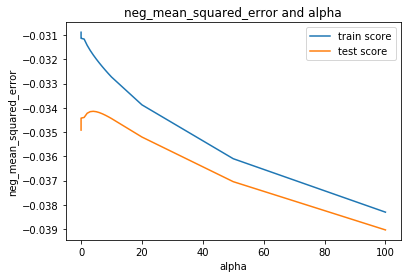

In [260]:
# plotting neg_mean_squared_error test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_squared_error')
plt.title("neg_mean_squared_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [261]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.03414102303200319


From the above we can see that optimal aplha value for Rigde regularization is 2. Lets use this and arrive at the model metrics to see the performance of the model

In [272]:
# Performing Rigde and identifying optimal coefficents and model metrics
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.04485459,  0.14062462,  0.10241552,  0.14817056,  0.04495187,
       -0.09771299, -0.06531748, -0.09771299,  0.2018454 ,  0.08964311,
       -0.01199173, -0.25115599, -0.17097653,  0.11133492,  0.00631324,
        0.08248221,  0.08802681,  0.14596706,  0.04207914, -0.09588523,
        0.064     , -0.0742853 ,  0.064     , -0.0742853 , -0.13375849,
       -0.06290809, -0.06290809, -0.06290809, -0.13939089, -0.06290809])

In [273]:
# predict
X_test_new=X_test[X_train_rfe.columns]

y_train_pred = ridge.predict(X_train_rfe)
print('R2 score for train set is: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test_new)
print('R2 score for test set is: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score for train set is:  0.8034142280736813
R2 score for test set is:  0.766233589363098


In [274]:
# model coefficients
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
final_rigde_coef = list(zip(cols, model_parameters))
final_rigde_coef.sort(key=lambda x: x[1], reverse=True)
final_rigde_coef

[('constant', 11.965),
 ('OverallQual_9', 0.202),
 ('2ndFlrSF', 0.148),
 ('OverallCond_9', 0.146),
 ('TotalBsmtSF', 0.141),
 ('OverallCond_5', 0.111),
 ('1stFlrSF', 0.102),
 ('OverallQual_10', 0.09),
 ('OverallCond_8', 0.088),
 ('OverallCond_7', 0.082),
 ('BsmtCond_None', 0.064),
 ('BsmtFinType1_None', 0.064),
 ('BsmtFinSF1', 0.045),
 ('GrLivArea', 0.045),
 ('RoofMatl_Tar&Grv', 0.042),
 ('OverallCond_6', 0.006),
 ('OverallCond_2', -0.012),
 ('GarageType_None', -0.063),
 ('GarageFinish_None', -0.063),
 ('GarageQual_None', -0.063),
 ('GarageCond_None', -0.063),
 ('MSSubClass_160', -0.065),
 ('BsmtCond_Po', -0.074),
 ('Electrical_Mix', -0.074),
 ('Exterior1st_BrkComm', -0.096),
 ('MSSubClass_90', -0.098),
 ('BldgType_Duplex', -0.098),
 ('Functional_Sev', -0.134),
 ('GarageQual_Po', -0.139),
 ('OverallCond_4', -0.171),
 ('OverallCond_3', -0.251)]

These are the variables that are significant in predicting the price of a house using Rigde Regression

### Lasso
- Use Lasso regularization to reduce the complexity of the model
- Arrive at best alpha value using GridgeSearch cross validation 
- Use the optimal aplha and arrive at optimal model

In [265]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013521038064205015, tolerance: 0.013353087253656202
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019044787779932904, tolerance: 0.012884974104427113
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09652825873003579, tolerance: 0.01345498383720479
  positive)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [266]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046382,0.027063,0.0024,0.001960,1e-05,{'alpha': 1e-05},-0.032536,-0.036169,-0.033408,-0.035887,-0.037800,-0.035160,0.001922,3,-0.030906,-0.030166,-0.032465,-0.030538,-0.030326,-0.030880,0.000830
1,0.018393,0.001959,0.0000,0.000000,0.0001,{'alpha': 0.0001},-0.032400,-0.036072,-0.032670,-0.035920,-0.037421,-0.034896,0.002000,2,-0.030971,-0.030233,-0.032487,-0.030582,-0.030376,-0.030930,0.000817
2,0.009597,0.001958,0.0016,0.001960,0.001,{'alpha': 0.001},-0.032431,-0.035690,-0.030385,-0.036078,-0.037831,-0.034483,0.002692,1,-0.032698,-0.031836,-0.034069,-0.032195,-0.031985,-0.032557,0.000810
3,0.004796,0.001602,0.0000,0.000000,0.01,{'alpha': 0.01},-0.045545,-0.040390,-0.041312,-0.046918,-0.047707,-0.044374,0.002973,4,-0.044575,-0.044057,-0.043724,-0.042867,-0.042391,-0.043523,0.000793
4,0.003999,0.000002,0.0016,0.001959,0.05,{'alpha': 0.05},-0.054785,-0.048469,-0.050345,-0.052771,-0.054633,-0.052201,0.002461,5,-0.051213,-0.052873,-0.052874,-0.051199,-0.050896,-0.051811,0.000875


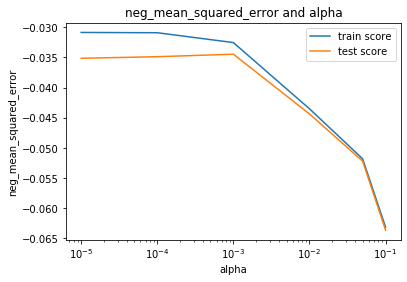

In [267]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_squared_error')
plt.xscale('log')
plt.title("neg_mean_squared_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [268]:
# Finding optimal alpha value
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.03448304728647168


From the above we can see that optimal aplha value for Lasso regularization is 0.001. Lets use this and arrive at the model metrics to see the performance of the model

In [269]:
# Using optimal alpha value to derive the coefficients
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
lasso.coef_

array([ 4.50783463e-02,  1.31906238e-01,  1.14325934e-01,  1.52208881e-01,
        4.10633599e-02, -1.68555142e-01, -4.45510483e-02, -1.89771200e-03,
        1.92592957e-01,  3.72004339e-02, -0.00000000e+00, -3.37754759e-01,
       -2.44986104e-01,  3.22608385e-02, -6.60316175e-02,  0.00000000e+00,
        0.00000000e+00,  4.24562912e-02,  0.00000000e+00, -0.00000000e+00,
        6.66824205e-02, -0.00000000e+00,  2.03314639e-15, -0.00000000e+00,
       -0.00000000e+00, -2.31710842e-01, -5.06008353e-15, -3.03301710e-17,
       -5.87038950e-02, -1.80812818e-04])

In [270]:
# Using lasso regularization predict the target variable and calculate the R2 score 
X_test_new=X_test[X_train_rfe.columns]

y_train_pred = lasso.predict(X_train_rfe)
print('R2 score for train set is: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test_new)
print('R2 score for test set is: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score for train set is:  0.7981866124498305
R2 score for test set is:  0.761388870166676


The R2 score of 0.85 on test is pretty decent. Hence we can say that the model is good to be used for prediction

In [271]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
final_lasso_coef = list(zip(cols, model_parameters))
final_lasso_coef.sort(key=lambda x: x[1], reverse=True)
final_lasso_coef

[('constant', 12.043),
 ('OverallQual_9', 0.193),
 ('2ndFlrSF', 0.152),
 ('TotalBsmtSF', 0.132),
 ('1stFlrSF', 0.114),
 ('BsmtCond_None', 0.067),
 ('BsmtFinSF1', 0.045),
 ('OverallCond_9', 0.042),
 ('GrLivArea', 0.041),
 ('OverallQual_10', 0.037),
 ('OverallCond_5', 0.032),
 ('OverallCond_2', -0.0),
 ('OverallCond_7', 0.0),
 ('OverallCond_8', 0.0),
 ('RoofMatl_Tar&Grv', 0.0),
 ('Exterior1st_BrkComm', -0.0),
 ('BsmtCond_Po', -0.0),
 ('BsmtFinType1_None', 0.0),
 ('Electrical_Mix', -0.0),
 ('Functional_Sev', -0.0),
 ('GarageFinish_None', -0.0),
 ('GarageQual_None', -0.0),
 ('GarageCond_None', -0.0),
 ('BldgType_Duplex', -0.002),
 ('MSSubClass_160', -0.045),
 ('GarageQual_Po', -0.059),
 ('OverallCond_6', -0.066),
 ('MSSubClass_90', -0.169),
 ('GarageType_None', -0.232),
 ('OverallCond_4', -0.245),
 ('OverallCond_3', -0.338)]

These are the variables that are significant in predicting the price of a house using Lasso Regression